<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

# 📝 Assignment

# **🌱 기본 과제**

## **Part 1. 데이터셋 불러오기**

- 서울시 기간별 시간평균 대기환경 정보 데이터셋을 불러오세요. 
  - 다음 [링크](https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do)에서 `2020년 3월`의 데이터셋을 다운받으세요. 
- 불러온 데이터셋을 변수 `data`에 저장하세요.
  - 한글 데이터이므로 `encoding` 파라미터 설정이 필요합니다. 
  - `측정일시`, `측정소명`, `오존(ppm)` column만 사용합니다. column을 추출하는 방법은 여러 가지가 있는데, 이번에는 `usecols` 파라미터를 한번 사용해 보세요. 
- `data`에서 `측정소명`이 **`송파구`**인 데이터를 추출하여 `df`에 저장하세요. 
- `df`의 index를 재설정 하세요.

##### **Q1. `df`의 row는 모두 몇 개인지 쓰세요.**

In [ ]:
# 데이터셋 업로드
from google.colab import files
files.upload()

In [ ]:
# 데이터셋 불러오기 

import pandas as pd

data = pd.read_csv('./data_air.csv', encoding='cp949')
data.head(3)

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003


In [ ]:
# 측정일시, 측정소명, 오존(ppm) column만 추출하여 데이터셋 불러오기  
data = pd.read_csv('./data_air.csv', encoding='cp949', usecols=['측정일시', '측정소명', '오존(ppm)'])

# index 초기화
df = data[data['측정소명'] == '송파구'].reset_index(drop=True)
df

,측정일시,측정소명,오존(ppm)
0,202003312300,송파구,0.020
1,202003312200,송파구,0.021
2,202003312100,송파구,0.025
3,202003312000,송파구,0.032
4,202003311900,송파구,0.034
...,...,...,...
739,202003010400,송파구,0.002
740,202003010300,송파구,0.002
741,202003010200,송파구,0.002
742,202003010100,송파구,0.002


## **Part 2. 큰 수의 법칙**

표본 크기가 커질수록 표본평균이 모평균에 가까워지는 것을 확인합니다. 

### **2-1. 모평균**
- `df`에서 `오존(ppm)` column을 추출하여 변수 `pop`에 저장합니다. 우리는 `pop`을 모집단이라 가정한 뒤 분석을 진행합니다. 
- 모평균을 `pop_mean`에 저장하세요. 

##### **Q2. 모평균을 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [ ]:
# 변수 지정 
pop = df['오존(ppm)']

In [ ]:
# 모평균 
pop_mean = pop.mean()

round(pop_mean, 2)

0.02

### **2-2. 표본 크기에 따른 표본 평균**
- 모집단에서 10개의 데이터를 추출하여 평균을 `sample_10_mean`에 저장하세요.
- 모집단에서 200개의 데이터를 추출하여 평균을 `sample_200_mean`에 저장하세요. 
- 데이터를 추출할 때, [`.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) 함수를 활용하세요. 
  - `random_state=2`로 설정합니다. 
  - 중복 추출을 허용합니다. 

##### **Q3. 모평균과 표본 크기가 10인 표본의 평균의 차의 절댓값을 $a$, 모평균과 표본 크기가 200인 표본의 평균의 차의 절댓값을 $b$라 할 때, $a \over b$의 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [ ]:
# 모집단에서 각각 10개, 200개의 데이터를 랜덤으로 추출
sample_10 = pop.sample(10, random_state=2, replace=True)
sample_200 = pop.sample(200, random_state=2, replace=True)

In [ ]:
# 10개 데이터의 평균
sample_10_mean = sample_10.mean()
sample_10_mean

0.0256

In [ ]:
# 200개 데이터의 평균 
sample_200_mean = sample_200.mean()
sample_200_mean

0.023735

In [ ]:
print('모평균과 표본 크기가 10인 표본의 평균의 차:', sample_10_mean - pop_mean)
print('모평균과 표본 크기가 200인 표본의 평균의 차:', sample_200_mean - pop_mean)

모평균과 표본 크기가 10인 표본의 평균의 차: 0.002011290322580645
모평균과 표본 크기가 200인 표본의 평균의 차: 0.00014629032258064306


In [ ]:
round((sample_10_mean-pop_mean) / (sample_200_mean-pop_mean), 2)

13.75

### **2-3. 시각화**
- 다음 시각화를 구현하세요.  <br>
  <img src = 'https://i.imgur.com/cC8DaP1.png'>

##### **Q4. 주어진 시각화와 같이 히스토그램을 나타내려고 합니다. `plt.hist()`를 활용할 때, `()`안에 들어갈 인자는 무엇일까요?**
- 모집단의 데이터 분포
- 표본 크기가 10인 표본의 데이터 분포
- 표본 크기가 200인 표본의 데이터 분포 
- 표본 크기가 10인 표본의 평균의 분포
- 표본 크기가 200인 표본의 평균의 분포 

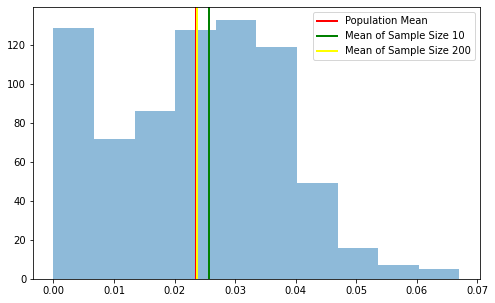

In [ ]:
# 표본 크기에 따른 평균을 비교하는 시각화 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(pop,alpha=0.5)
plt.axvline(pop_mean, c='red', lw=2, label='Population Mean')
plt.axvline(sample_10_mean, c='green', lw=2, label='Mean of Sample Size 10')
plt.axvline(sample_200_mean, c='yellow', lw=2, label = 'Mean of Sample Size 200')
plt.legend();

## **Part 3. 중심극한정리**

표본들의 평균 분포가 정규분포를 이루는지 다음 순서에 따라 확인합니다.  

1. numpy의 `randam.choice()` 함수를 활용하여 `df['오존(ppm)']`에서 20개의 데이터를 추출합니다.
  - 중복 추출을 허용합니다. 
2. 20개의 데이터의 평균을 계산하여 리스트 `s1`에 저장합니다. 
3. 1~2 과정을 `for loop`을 이용하여 10,000번 반복합니다. 즉, `s1`에는 10,000번 추출된 20개의 데이터의 평균값이 저장됩니다. 
4. 평균값들의 분포를 `seaborn.kdeplot()`을 활용하여 시각화 하세요. <br>
  https://seaborn.pydata.org/generated/seaborn.kdeplot.html

##### **Q5. 평균 값들의 분포를 시각화한 결과는 어떤 모습일까요?**

In [ ]:
# df['오존(ppm)']에서 20개의 데이터를 10,000번 추출하여 그 평균을 s1에 저장 

import numpy as np
import seaborn as sns

s1 = []

for _ in range(10000):
    sample = np.random.choice(df['오존(ppm)'], 20)
    s1.append(sample.mean())

In [ ]:
s1 = np.array(s1)

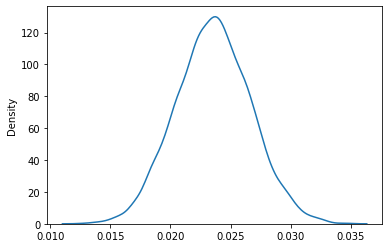

In [ ]:
# 표본 평균 분포 시각화 

sns.kdeplot(s1)
plt.show();

## **Part 4. 신뢰구간**
**Part 3** 에서 빌드한 표본 평균 분포에 대하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 시각화합니다. 
- 표본 평균의 평균은 초록 세로선으로, 신뢰구간 95% 구간은 빨간 세로선으로 나타내세요. 

##### **Q6. 95% 신뢰구간을 시각화한 결과는 어떤 모습일까요?**

In [ ]:
# 표본 평균의 평균
s1_mean = s1.mean()

# 표본 평균의 95% 신뢰구간 
s1_lower, s1_upper = np.percentile(s1, 2.5), np.percentile(s1, 97.5)

In [ ]:
print(f'신뢰구간 : {s1_lower, s1_upper}')

신뢰구간 : (0.017350000000000004, 0.029700000000000004)


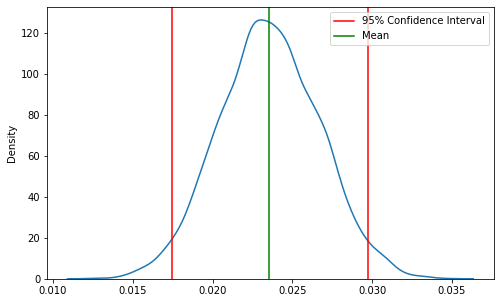

In [ ]:
# 신뢰구간 시각화 

plt.figure(figsize=(8, 5))
sns.kdeplot(s1)
plt.axvline(s1_lower, c='red', label='95% Confidence Interval')
plt.axvline(s1_upper, c='red')
plt.axvline(s1_mean, c='green', label='Mean')
plt.legend();

# **🥇 도전 과제**

> 2번에서 구한 두 표본 sample_10, sample_200을 계속 사용합니다.

</br>

- 한 표본의 신뢰구간을 수학적으로 다음 식과 같이 나타낼 수 있습니다. 
  > $\bar{x} ± t \cdot {s\over \sqrt{n}}$
  - $\bar{x}$ : 표본의 평균
  - $t$ : t-value <br>
    - [stats.t.ppf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) 메소드를 활용해 구할 수 있습니다. 신뢰도(confidence level)는 95%로 합니다. 
    - 다음 [stackoverflow](https://stackoverflow.com/questions/67340028/how-to-use-t-ppf-which-are-the-arguments)를 참고하세요. 
  - $s$ : 표본의 표준편차
  - $n$ : 데이터 수 

- **신뢰구간 식과 `plt.bar()`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.**

  <img src = 'https://i.imgur.com/MpDSFtn.png'>

- **위의 시각화로부터 도출할 수 있는 insight를 설명해 보세요.** 

In [ ]:
from scipy import stats

# 신뢰구간 식을 구현한 함수 생성 
def confidence_interval(data, confidence = 0.95):
    
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)

    # 표준오차 s/sqrt{n}
    stderr = stats.sem(data) 

    interval = stderr * stats.t.ppf((1+confidence)/2 , n-1)
    return (mean - interval, mean + interval)

In [ ]:
sample_10_mean

0.0256

In [ ]:
CI1 = confidence_interval(sample_10)
CI1 

(0.019509422194094756, 0.03169057780590524)

In [ ]:
sample_200_mean

0.023735

In [ ]:
CI2 = confidence_interval(sample_200)
CI2

(0.02193707704080939, 0.02553292295919061)

In [ ]:
pop_mean

0.023588709677419356

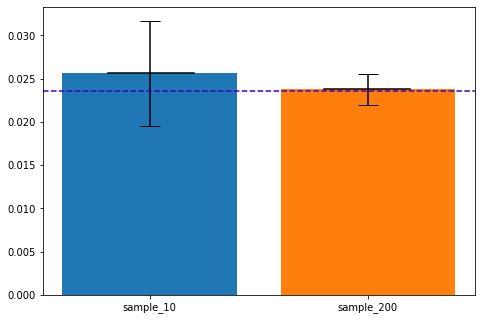

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.bar(x='sample_10', height=sample_10_mean, yerr=CI1[0]-sample_10_mean, capsize=10)
plt.bar(x='sample_200', height=sample_200_mean, yerr=CI2[0]-sample_200_mean, capsize=10)
plt.axhline(pop_mean, linestyle='--', color='#4000c7')
plt.axhline(sample_10_mean, color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(sample_200_mean, color = 'black', xmin = 0.65, xmax = 0.85)

plt.show()